In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import RandomUniform
import json
import numpy as np

In [2]:
model = Sequential()
model.add(Dense(6, input_dim=8, kernel_initializer='uniform', activation='relu', use_bias=True, bias_initializer='uniform'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid', use_bias=True, bias_initializer='uniform'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 54        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.load_weights('initial_weights.h5')
model.summary()

In [ ]:
#experimental deep network
model = Sequential()
model.add(Dense(10, input_dim=8, kernel_initializer=RandomUniform(-0.05, 0.05), activation='relu', use_bias=True, bias_initializer=RandomUniform(-0.05, 0.05)))
model.add(Dense(10, kernel_initializer=RandomUniform(-0.05, 0.05), activation='relu', use_bias=True, bias_initializer=RandomUniform(-0.05, 0.05)))
model.add(Dense(6, kernel_initializer=RandomUniform(-0.05, 0.05), activation='relu', use_bias=True, bias_initializer=RandomUniform(-0.05, 0.05)))
model.add(Dense(1, kernel_initializer=RandomUniform(-0.05, 0.05), activation='sigmoid', use_bias=True, bias_initializer=RandomUniform(-0.05, 0.05)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_35 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_36 (Dense)             (None, 6)                 66        
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 7         
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#experimental shallow
model = Sequential()
model.add(Dense(1, input_dim=8, kernel_initializer='uniform', activation='sigmoid', use_bias=True, bias_initializer='uniform'))
model.summary()

In [ ]:
#experiment with removing 1 feature at a time
model = Sequential()
model.add(Dense(3, input_dim=2, kernel_initializer='uniform', activation='relu', use_bias=True, bias_initializer='uniform'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid', use_bias=True, bias_initializer='uniform'))
model.summary()

In [ ]:
# compiling the model
model.compile(
 optimizer = "adam", #just gonna hope this is correct
 loss = "binary_crossentropy", #I think this is appropriate because the model classifies win/loss with probability in range (0-1)
 metrics = ["accuracy"]
)

In [ ]:
print(model.get_weights())

In [ ]:
print(model.get_weights())

In [ ]:
# print to lua format
print("printing to Lua format:")
modelWeights = model.get_weights()
for i,layer in enumerate(modelWeights):
    if i%2 == 0:
        print('{')
        for j,node in enumerate(layer):
            print('{',end='')
            for k,w in enumerate(node):
                print(w,end='')
                if k < node.size - 1:
                    print(',',end='')
            print('},')
    else:
        print('{',end='')
        for j,node in enumerate(layer):
            print(node,end='')
            if j < layer.size - 1:
                print(',',end='')
        print('}')
        print('}',end='')
        if i < len(modelWeights) - 1:
            print(',')

printing to Lua format:
{
{1.6840228,1.2080216,1.3890104,0.6936591,0.6201604,-1.0781312},
{0.85501254,0.14242889,0.015221793,0.5609272,0.15892643,0.7637075},
{-1.7778802,-0.98465693,-1.2283139,-0.12462513,-0.33503926,2.1325994},
{-0.27260488,0.021732453,0.24134208,0.24100713,-0.059519954,1.2957598},
{-0.21612136,-0.41285786,-0.20107973,-0.16087301,0.44857815,1.0908333},
{2.1532454,0.94359815,1.0784339,1.0867945,0.7331096,-1.3116993},
{0.23970893,0.20522864,-0.045297023,-0.23538433,0.44485608,0.9502267},
{0.69320583,0.26774937,-0.17918186,0.5230778,-0.25542137,1.209758},
{-0.054367118,-0.12507842,0.028775942,-0.1498849,-0.10822733,1.7348676}
},
{
{0.87698644},
{1.0883582},
{0.8230581},
{0.43343285},
{0.52687174},
{-0.64260894},
{-0.6699466}
}

In [ ]:
# test calculate predictions
a = np.array([[1, 1, 1, 1, 0.5, 0.5, 1, 1]])
predictions = model.predict(a)
print(predictions)

[[0.49734595]]


In [ ]:
gameData = []
with open('data/mod_botwar_train_data.txt') as f:
    for line in f:
        gameData.append(json.loads(line))
    
data = []
for i,game in enumerate(gameData):
    for j,datum in enumerate(game):
        data.append(datum)
    
X = []
Y = []
for i,datum in enumerate(data):
    f = datum['f']
    X.append(f)
    Y.append(datum['z'])
X = np.array(X)
Y = np.array(Y)

history = model.fit(X, Y, validation_split=0.33, epochs=10, batch_size=200, shuffle=True)    

Train on 129143 samples, validate on 63609 samples
Epoch 1/10
129143/129143 [==============================] - 1s 8us/step - loss: 0.2443 - acc: 0.8769 - val_loss: 0.2311 - val_acc: 0.8866
Epoch 2/10
129143/129143 [==============================] - 1s 8us/step - loss: 0.2442 - acc: 0.8766 - val_loss: 0.2312 - val_acc: 0.8862
Epoch 3/10
129143/129143 [==============================] - 1s 8us/step - loss: 0.2440 - acc: 0.8772 - val_loss: 0.2304 - val_acc: 0.8869
Epoch 4/10
129143/129143 [==============================] - 1s 8us/step - loss: 0.2440 - acc: 0.8770 - val_loss: 0.2304 - val_acc: 0.8870
Epoch 5/10
129143/129143 [==============================] - 1s 8us/step - loss: 0.2440 - acc: 0.8768 - val_loss: 0.2301 - val_acc: 0.8876
Epoch 6/10
129143/129143 [==============================] - 1s 8us/step - loss: 0.2439 - acc: 0.8770 - val_loss: 0.2302 - val_acc: 0.8871
Epoch 7/10
129143/129143 [==============================] - 1s 8us/step - loss: 0.2439 - acc: 0.8778 - val_loss: 0.2311 -

In [ ]:
model.save_weights('initial_weights.h5')

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


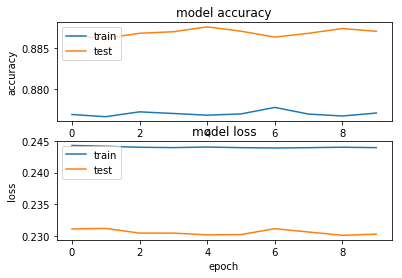

In [ ]:
import matplotlib.pyplot as plt 
    
print(history.history.keys())  
   
plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

In [ ]:
#current best: 
#loss: 0.2439 - acc: 0.8771 - val_loss: 0.2303 - val_acc: 0.8871 8-6-1
#loss: 0.2414 - acc: 0.8793 - val_loss: 0.2276 - val_acc: 0.8884 8-10-10-6-1